<a href="https://colab.research.google.com/github/jrad9921/Data-Analysis/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dependencies

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Data Collection and Analysis

In [6]:
df = pd.read_csv('insurance.csv')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.shape

(1338, 7)

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Data Visualization

Categorical Features:
1. sex
2. smoker
3. region

Numerical Features:
1. age
2. bmi
3. children

Target:
Charges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

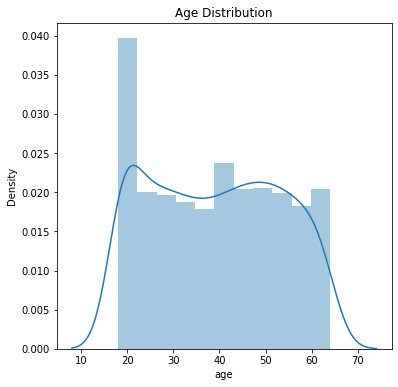

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


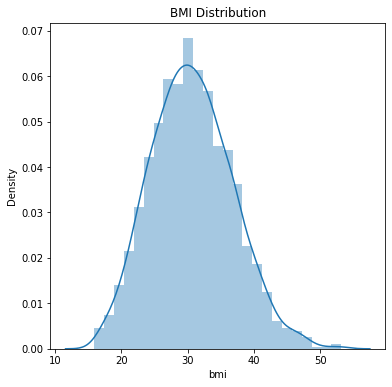

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

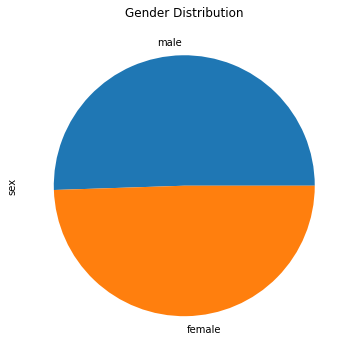

In [35]:
plt.figure(figsize=(6,6))
df['sex'].value_counts().plot(kind='pie')
plt.title('Gender Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


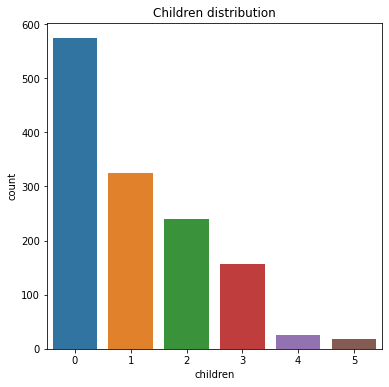

In [48]:
plt.figure(figsize = (6,6))
sns.countplot(df['children'])
plt.title('Children distribution')
plt.show()

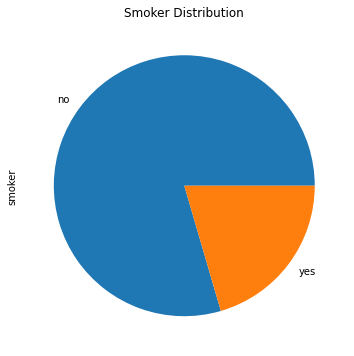

In [45]:
plt.figure(figsize=(6,6))
df['smoker'].value_counts().plot(kind='pie')
plt.title('Smoker Distribution')
plt.show()

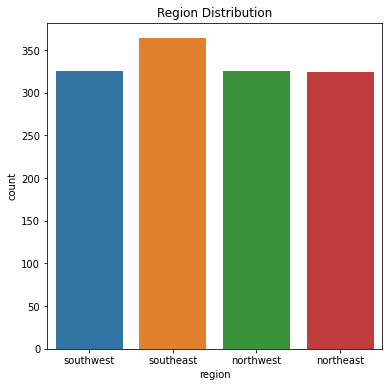

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


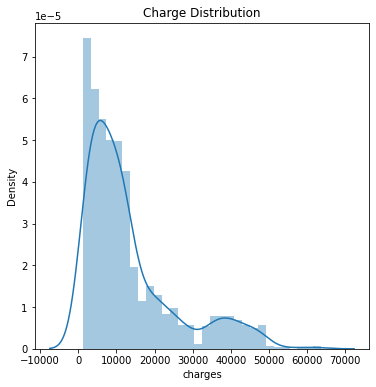

In [52]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

#Label Encoding
Encoding the categorical features into appropriate numerical values

In [68]:
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
df.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)
df.replace({'region':{'southeast': 0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#Feature(x)-Traget(y) Splitting

In [100]:
x = df.drop(columns='charges', axis=1)
y = df['charges'] 

In [74]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [75]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#Train-Test Splitting

In [77]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state=2)

In [81]:
print(x.shape, xtrain.shape, xtest.shape)

(1338, 6) (1070, 6) (268, 6)


#Model Training

In [82]:
#Choosing the model
model = LinearRegression()

In [85]:
#Fitting the training data into the model in order to obtain the line that fits all data points
model.fit(xtrain, ytrain)

LinearRegression()

#Model Evaluation

In [92]:
training_prediction = model.predict(xtrain)
training_accuracy = r2_score(training_prediction, ytrain)
print('Training accruacy is: ', training_accuracy)

Training accruacy is:  0.6693380032904603


In [93]:
test_prediction = model.predict(xtest)
test_accuracy = r2_score(test_prediction, ytest)
print('Test accuracy is: ', test_accuracy)

Test accuracy is:  0.6606659986058923


#Building a Predictive System

In [96]:
input = (31,1,25.74,0,1,0)
input_data = np.asarray(input)
input_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_reshaped)
print('Insurance cost in USD is ', prediction[0])


Insurance cost in USD is  3760.080576496064


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


The actual value is 3756.6216. while the predicted value is 3760 which is quite close. And therefore the model is trustable.